In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar zxf aclImdb_v1.tar.gz
!rm -rf aclImdb/train/unsup
!cat aclImdb/README

--2024-07-25 14:18:16--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  7.00MB/s    in 13s     

2024-07-25 14:18:28 (6.42 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [2]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [9]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## Problem 1

- 1-gram

In [10]:
first = 'This movie is SOOOO funny!!!'.split()
second = 'What a movie! I never'.split()
third = 'best movie ever!!!!! this movie'.split()

first = [s.lower().replace('!', '') for s in first]
second = [s.lower().replace('!', '') for s in second]
third = [s.lower().replace('!', '') for s in third]

gram_1_all = first + second + third

In [17]:
import numpy as np
gram_1 = pd.DataFrame(np.zeros((3, len(set(gram_1_all)))).astype(int), columns=list(set(gram_1_all)))

gram_1_list = [first, second, third]
for i, ss in enumerate(gram_1_list):
    for s in ss:
        n = ss.count(s)
        gram_1[s][i] = n

gram_1

,i,is,best,movie,soooo,what,a,funny,ever,never,this
0,0,1,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,1,0,0,1,0
2,0,0,1,2,0,0,0,0,1,0,1


- 2-gram

In [18]:
gram_2_all  = []
gram_2_list = []
for s in gram_1_list:
    lis = []
    for i in range(len(s)-1):
        gram_2_all.append(f'{s[i]} {s[i+1]}')
        lis.append(f'{s[i]} {s[i+1]}')

    gram_2_list.append(lis)

In [21]:
gram_2 = pd.DataFrame(np.zeros((3, len(set(gram_2_all)))).astype(int), columns=list(set(gram_2_all)))

for i, ss in enumerate(gram_2_list):
    for s in ss:
        n = ss.count(s)
        gram_2[s][i] = n

gram_2

,movie i,soooo funny,a movie,movie is,is soooo,what a,movie ever,this movie,ever this,i never,best movie
0,0,1,0,1,1,0,0,1,0,0,0
1,1,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,1,0,1


- TF-IDF

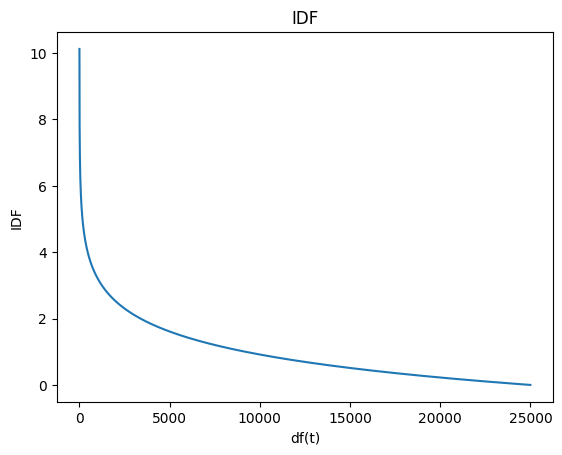

In [22]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [23]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [25]:
#NLTK
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## Problem 2

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train = (vectorizer_train.fit_transform(x_train))
vec = vectorizer_train.get_feature_names_out()

vectorizer_test = TfidfVectorizer(stop_words=stop_words,
                                  max_features=5000,
                                  vocabulary=vec)
X_test = vectorizer_test.fit_transform(x_test)
print(X_train.shape, X_test.shape)

(25000, 5000) (25000, 5000)


## Problem 3

In [29]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier().fit(X_train,y_train)
y_pred = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.328905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445520
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 4998
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("{}".format(lgb.score(X_test, y_test)))
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.8606
0.8523411240522161
0.87232
0.8622148420511604
[[10611  1889]
 [ 1596 10904]]


## Problem 4

- Standard Formula

In [31]:
tf = gram_1.copy()
idf = gram_1.copy()

for i in range(len(tf)):
    tf.iloc[i, :] = tf.iloc[i, :] / tf.iloc[i, :].sum()

for t in idf.columns:
    idf[t][:] = np.log(len(idf.columns) / idf[t].sum())

<ipython-input-31-d8a1e29168ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())
<ipython-input-31-d8a1e29168ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())
<ipython-input-31-d8a1e29168ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())
<ipython-input-31-d8a1e29168ea>:8: Setti

In [32]:
tf

,i,is,best,movie,soooo,what,a,funny,ever,never,this
0,0.0,0.2,0.0,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.2
1,0.2,0.0,0.0,0.2,0.0,0.2,0.2,0.0,0.0,0.2,0.0
2,0.0,0.0,0.2,0.4,0.0,0.0,0.0,0.0,0.2,0.0,0.2


In [33]:
idf

,i,is,best,movie,soooo,what,a,funny,ever,never,this
0,2.397895,2.397895,2.397895,1.011601,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.704748
1,2.397895,2.397895,2.397895,1.011601,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.704748
2,2.397895,2.397895,2.397895,1.011601,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.704748


In [34]:
tf * idf

,i,is,best,movie,soooo,what,a,funny,ever,never,this
0,0.000000,0.479579,0.000000,0.20232,0.479579,0.000000,0.000000,0.479579,0.000000,0.000000,0.34095
1,0.479579,0.000000,0.000000,0.20232,0.000000,0.479579,0.479579,0.000000,0.000000,0.479579,0.00000
2,0.000000,0.000000,0.479579,0.40464,0.000000,0.000000,0.000000,0.000000,0.479579,0.000000,0.34095


- Formula adopted by scikit-learn

In [35]:
tf_2 = gram_1.copy()
idf_2 = gram_1.copy()

for t in idf.columns:
    idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1

<ipython-input-35-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1
<ipython-input-35-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1
<ipython-input-35-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 +

In [36]:
tf_2 * idf_2

,i,is,best,movie,soooo,what,a,funny,ever,never,this
0,0.000000,1.381543,0.000000,2.089949,1.381543,0.000000,0.000000,1.381543,0.000000,0.000000,1.674285
1,1.381543,0.000000,0.000000,2.089949,0.000000,1.381543,1.381543,0.000000,0.000000,1.381543,0.000000
2,0.000000,0.000000,1.381543,4.179898,0.000000,0.000000,0.000000,0.000000,1.381543,0.000000,1.674285


In [37]:
!pip install gensim

In [42]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=10)
print("List of vocabulary: {}".format(model.wv.key_to_index.keys()))
for vocab in model.wv.key_to_index.keys():
    print("Vector of {} : \n{}".format(vocab, model.wv[vocab]))

List of vocabulary: dict_keys(['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie'])
Vector of very : 
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
Vector of bad : 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
Vector of good : 
[ 0.07311065  0.05070519  0.06759309  0.00761263  0.06350898 -0.03405724
 -0.0094533   0.05768519 -0.07522386 -0.03936936]
Vector of is : 
[-0.07511994 -0.00930093  0.09538642 -0.07319568 -0.02333897 -0.01937847
  0.0807788  -0.05931221  0.00045165 -0.04753995]
Vector of this : 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
Vector of a : 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
Vector of film : 
[-0.01577198  0.00321244 -0.04143998 -0.07683337 -0

In [43]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.4273821711540222),
 ('bad', 0.3293360769748688),
 ('very', 0.30043885111808777)]

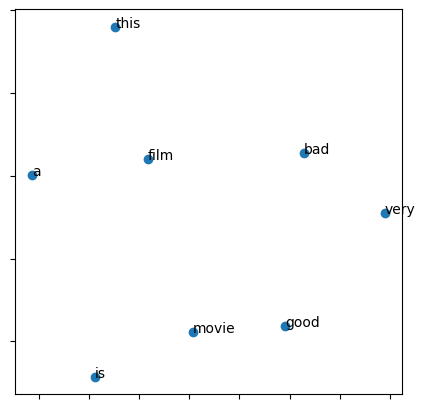

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.key_to_index.keys()
tsne_model = TSNE(perplexity=5, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_array = [model.wv[word] for word in vocabs]
vectors_array = np.array(vectors_array)
vectors_tsne = tsne_model.fit_transform(vectors_array)
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

## Problem 5

In [50]:
import re
for i, s in enumerate(x_train):
    if 'www' in s:
        print(i)
        print(s)
        break

38
I don't hand out "ones" often, but if there was ever a film that deserved this sort of attention, it's "Gas!" This is self-indulgent crap that reaches for some of the ambiance of M*A*S*H and falls completely flat on its face in the attempt.<br /><br />I see what Corman was going for - Malcolm Marmorstein and Elliott Gould tried to reproduce Gould's deathless role in the original movie version of M*A*S*H with a similar plot (in the movie "Whiffs" - look it up here in IMDb, http://www.imdb.com/title/tt0073891/ for more information).<br /><br />Marmorstein and Gould got closer to the brass ring with "Whiffs" than Corman did with "Gas!" but didn't quite get there. Neither one of those films even got close to the success of M*A*S*H.<br /><br />What's wrong with "Gas!"? What isn't? No one comes close to really acting at a level above junior high school theatrics. The production values stink. Someone else here mentioned the magically regenerating headlights on a getaway car, and there's mo

In [51]:
no_preprocessing = x_train[38]
after_preprocessing1 = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", no_preprocessing)
after_preprocessing2 = re.sub(r'<[^>]+>', " ", after_preprocessing1)
after_preprocessing3 = re.sub(r"[^0-9a-zA-Z ]", "", after_preprocessing2)
after_preprocessing = after_preprocessing3.lower()
after_preprocessing

'i dont hand out ones often but if there was ever a film that deserved this sort of attention its gas this is selfindulgent crap that reaches for some of the ambiance of mash and falls completely flat on its face in the attempt  i see what corman was going for  malcolm marmorstein and elliott gould tried to reproduce goulds deathless role in the original movie version of mash with a similar plot in the movie whiffs  look it up here in imdb  for more information  marmorstein and gould got closer to the brass ring with whiffs than corman did with gas but didnt quite get there neither one of those films even got close to the success of mash  whats wrong with gas what isnt no one comes close to really acting at a level above junior high school theatrics the production values stink someone else here mentioned the magically regenerating headlights on a getaway car and theres more of that lack of attention to detail nothing works the way its supposed to in this film and nobody cares  gas actu

## Problem 6

In [54]:
model = Word2Vec(min_count=1, vector_size=10)
model.build_vocab([after_preprocessing.split()])
model.train([after_preprocessing.split()], total_examples=model.corpus_count, epochs=model.epochs)

(819, 1490)